In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car_sales_data.csv")

print(df.head())

  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  


In [4]:
print(df.info())   # Data Structure（column name、type、null values）
print(df.describe()) # stastical info（mean、maximum/minimum）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None
        Engine size  Year of manufacture        Mileage          Price
count  50000.000000         50000.000000   50000.000000   50000.000000
mean       1.773058          2004.209440  112497.320700   13828.903160
std        0.734108             9.645965   71632.515602   16416.681336
min        1.000000          1984.000000     630.000000      76.000000
25%        1.400000 

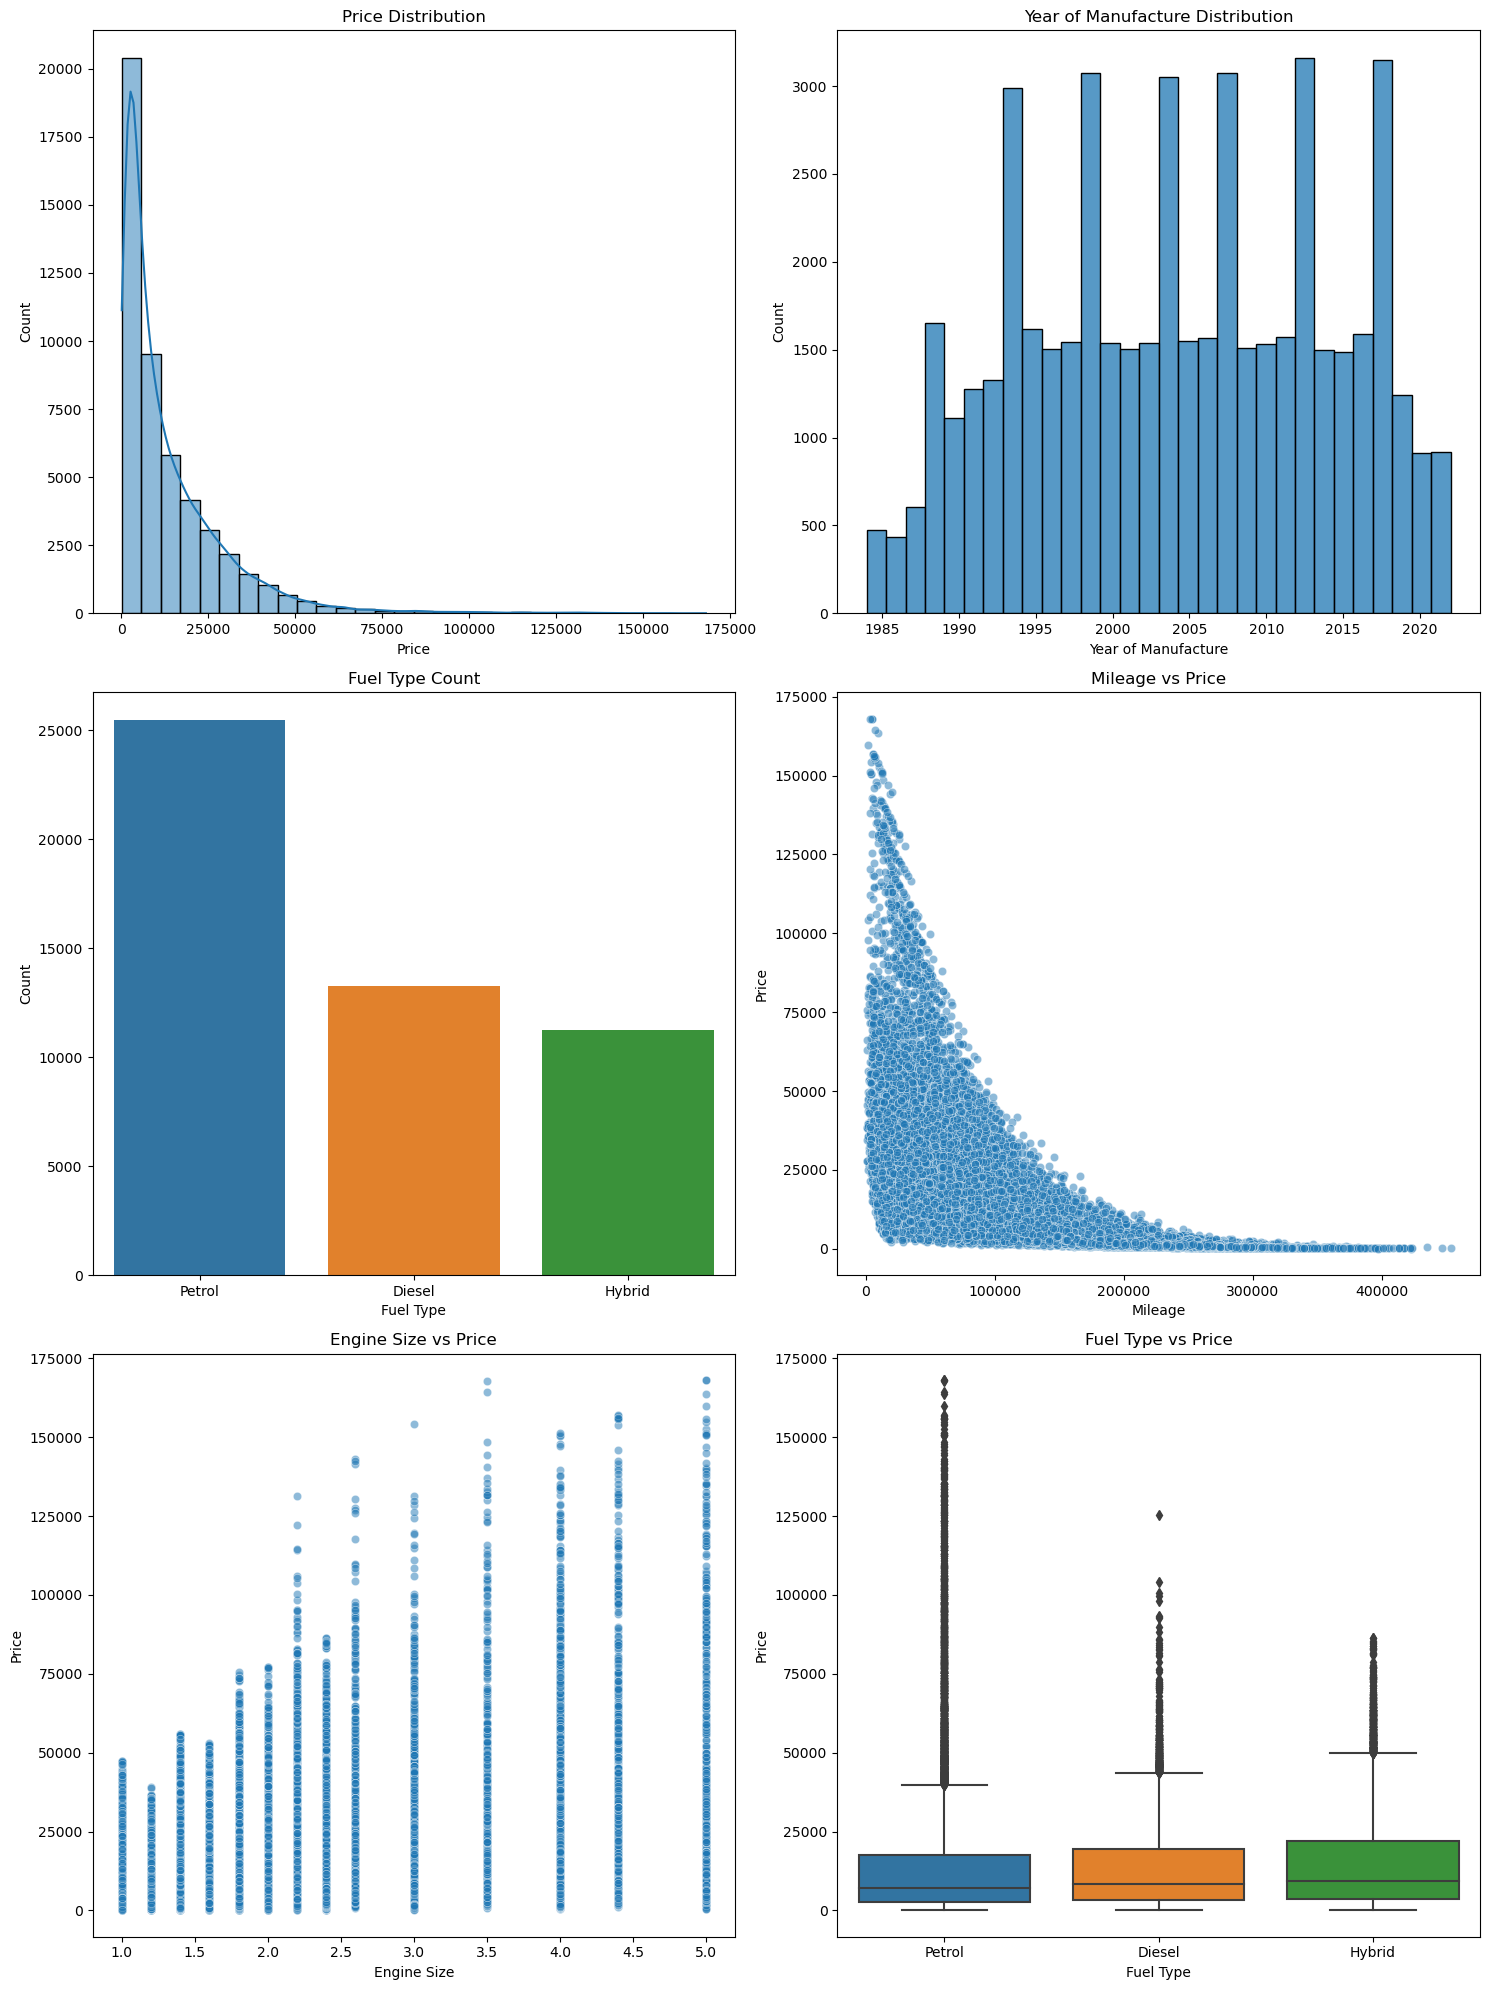

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

# 1. Price Distribution
plt.subplot(3, 2, 1)
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

# 2. Year of Manufacture Distribution
plt.subplot(3, 2, 2)
sns.histplot(df["Year of manufacture"], bins=30, kde=False)
plt.title("Year of Manufacture Distribution")
plt.xlabel("Year of Manufacture")
plt.ylabel("Count")

# 3. Fuel Type Count
plt.subplot(3, 2, 3)
sns.countplot(x="Fuel type", data=df)
plt.title("Fuel Type Count")
plt.xlabel("Fuel Type")
plt.ylabel("Count")

# 4. Mileage vs Price
plt.subplot(3, 2, 4)
sns.scatterplot(x="Mileage", y="Price", data=df, alpha=0.5)
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")

# 5. Engine Size vs Price
plt.subplot(3, 2, 5)
sns.scatterplot(x="Engine size", y="Price", data=df, alpha=0.5)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# 6. Fuel Type vs Price (Boxplot)
plt.subplot(3, 2, 6)
sns.boxplot(x="Fuel type", y="Price", data=df)
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary

1. **Price Distribution**  
   Most cars are priced below 25,000, with a long right tail caused by a few luxury cars reaching over 150,000.  
   This indicates a skewed distribution, and price transformation (e.g., log transformation) may help in prediction models.  

2. **Year of Manufacture Distribution**  
   The dataset covers cars manufactured between 1985 and 2020.  
   Car age is an important feature, as newer cars generally retain higher value.  
   A derived feature like `Car Age = 2022 - Year of Manufacture` can be more useful than the raw year.  

3. **Fuel Type Count**  
   Petrol cars dominate the dataset, followed by Diesel and Hybrid.  
   This shows a class imbalance, which could affect models if not handled properly.  

4. **Mileage vs Price**  
   A clear negative correlation is observed: higher mileage usually means lower price.  
   Mileage is therefore one of the strongest predictors for car price.  

5. **Engine Size vs Price**  
   Larger engine size tends to correlate with higher prices, although there is variance across brands/models.  
   This suggests engine size is useful but interacts with other features.  

6. **Fuel Type vs Price (Boxplot)**  
   Price distributions across fuel types are similar in median values, but Diesel and Hybrid cars show more variability.  
   Fuel type is a secondary but still relevant predictor for price.  

### Key Insights
- Strong predictors: **Mileage, Year (Car Age), Engine Size**  
- Categorical predictor with imbalance: **Fuel Type**  
- Target variable (Price) is skewed → may require log transformation  
- These findings guide the next step: **building a price prediction model**

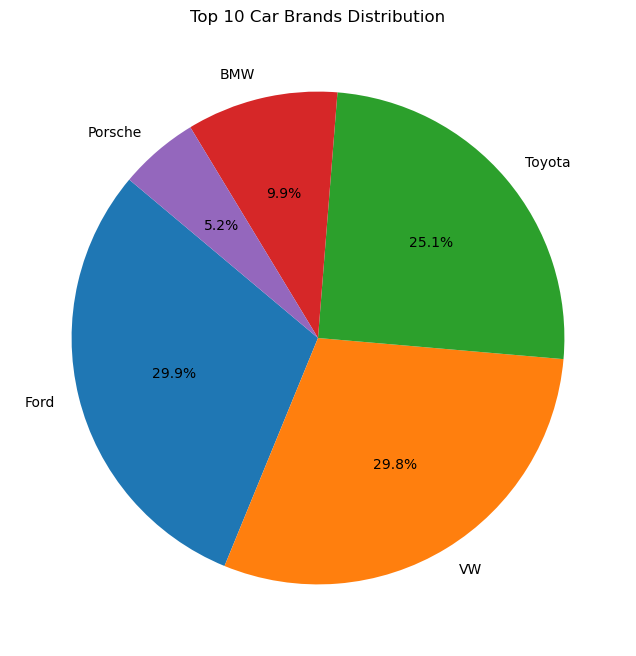

In [9]:
import matplotlib.pyplot as plt

# 统计每个品牌出现次数
brand_counts = df["Manufacturer"].value_counts()

# 画饼状图
plt.figure(figsize=(8, 8))
plt.pie(
    brand_counts.head(10),              # 只取前10个品牌，避免太拥挤
    labels=brand_counts.head(10).index, # 品牌名称
    autopct="%1.1f%%",                  # 显示百分比
    startangle=140,                     # 起始角度                      
)
plt.title("Top 10 Car Brands Distribution")
plt.show()

1. Overview

The pie chart illustrates the distribution of car brands in the dataset. It is clear that the market is mainly dominated by Ford, VW, and Toyota, while other brands such as BMW and Porsche account for smaller portions.

⸻

2. Key Findings
	1.	Ford (29.9%) and VW (29.8%)
	•	These two brands almost equally share the largest portion, together making up nearly 60%.
	•	They are the primary forces in the dataset and represent the mainstream market.
	2.	Toyota (25.1%)
	•	Accounts for about one-quarter of the dataset, ranking third.
	•	Along with Ford and VW, Toyota forms the top three brands in terms of market presence.
	3.	BMW (9.9%)
	•	Significantly lower share compared to the top three.
	•	Represents the mid-to-high-end segment with fewer samples but potentially higher average prices.
	4.	Porsche (5.2%)
	•	Holds the smallest share in the dataset.
	•	Belongs to the luxury/sports car segment, with limited frequency but high value.

⸻

3. Insights and Implications
	•	Market analysis: If this represents the used car market, Ford, VW, and Toyota dominate most transactions.
	•	Predictive modeling: In future car price prediction models, these three brands will contribute the most information, while BMW and Porsche provide valuable comparisons for premium segments.
	•	Business application: For advertising or recommendation systems, prioritizing Ford, VW, and Toyota would ensure broader coverage of the customer base.

⸻

4. Conclusion

The data shows that:
	•	Ford and VW are the absolute leaders.
	•	Toyota holds a strong secondary position.
	•	BMW and Porsche are smaller players but represent niche high-end markets.

Overall, the top three brands together account for more than 84% of the dataset, reflecting a highly concentrated brand distribution.